In [5]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

## Model the Buck Converter in Gekko

### Constants: 

### Parameters: 
 
Fixed/Feedforward Variables (FV): 
These are fixed in steady state conditions. They are model coefficients that change to fit 
process data or minimize an objective function. They refer to either measured or unmeasured disturbances to the system.
The passive components L, C, R 

Manipulated Variables (MV): 
are inputs/decision variables for an estimator or controller. These decision variables are adjusted by the optimizer to minimize an objective function

### Variables: 
State Variable: are model variables that may be measured or are of special interest for observation.

Controlled Variables: are model output variables that are included in the objective of a controller or optimizer. These variables are controlled to a range, maximized, or minimized. Controlled variables may also be measured values that are included for data reconciliation.
$e_1$, $e_3$, $e_4$, $i_4$, $i_5$



In [6]:
fs = 100e3
Ts = 1/fs 
fc = fs/20 
C = 1e-06
L = (1/C)*(1/(2*np.pi*fc))**2 # fc = 1/(2*pi*sqrt(LC))
Lmin = .1*L
Lmax = 10*L
Cmin = .1*C
Cmax = 10*C

0.0010132118364233778

An analytical approximation to a square wave with frequency f 
$$\frac{4}{\pi} \sum_{k=1, 3, 5,\ldots}^N \frac{sin(k\pi/N)}{k\pi/N}\frac{sin(2\pi ft)}{k}$$
where the first term is the Lanczos sigma factor designed to suppress the Gibb’s phenomenon associated with Fourier series approximations.

In [ ]:
def square(t, f=1, N=31):
    return (4/pi)*sum((N*sin(k*pi/N)/k/pi)*sin(2*k*f*pi*t)/k for k in range(1, N+1,2))
  
u = lambda t: square(t, 0.1)

first_order(5, 1, 30, u)

A step function 
$b_n(t) = \frac{1}{1 + (\frac{t}{c})^n}$
where $n$ is the order of a approximation, and $c$ is value of $t$ where the step change occurs.

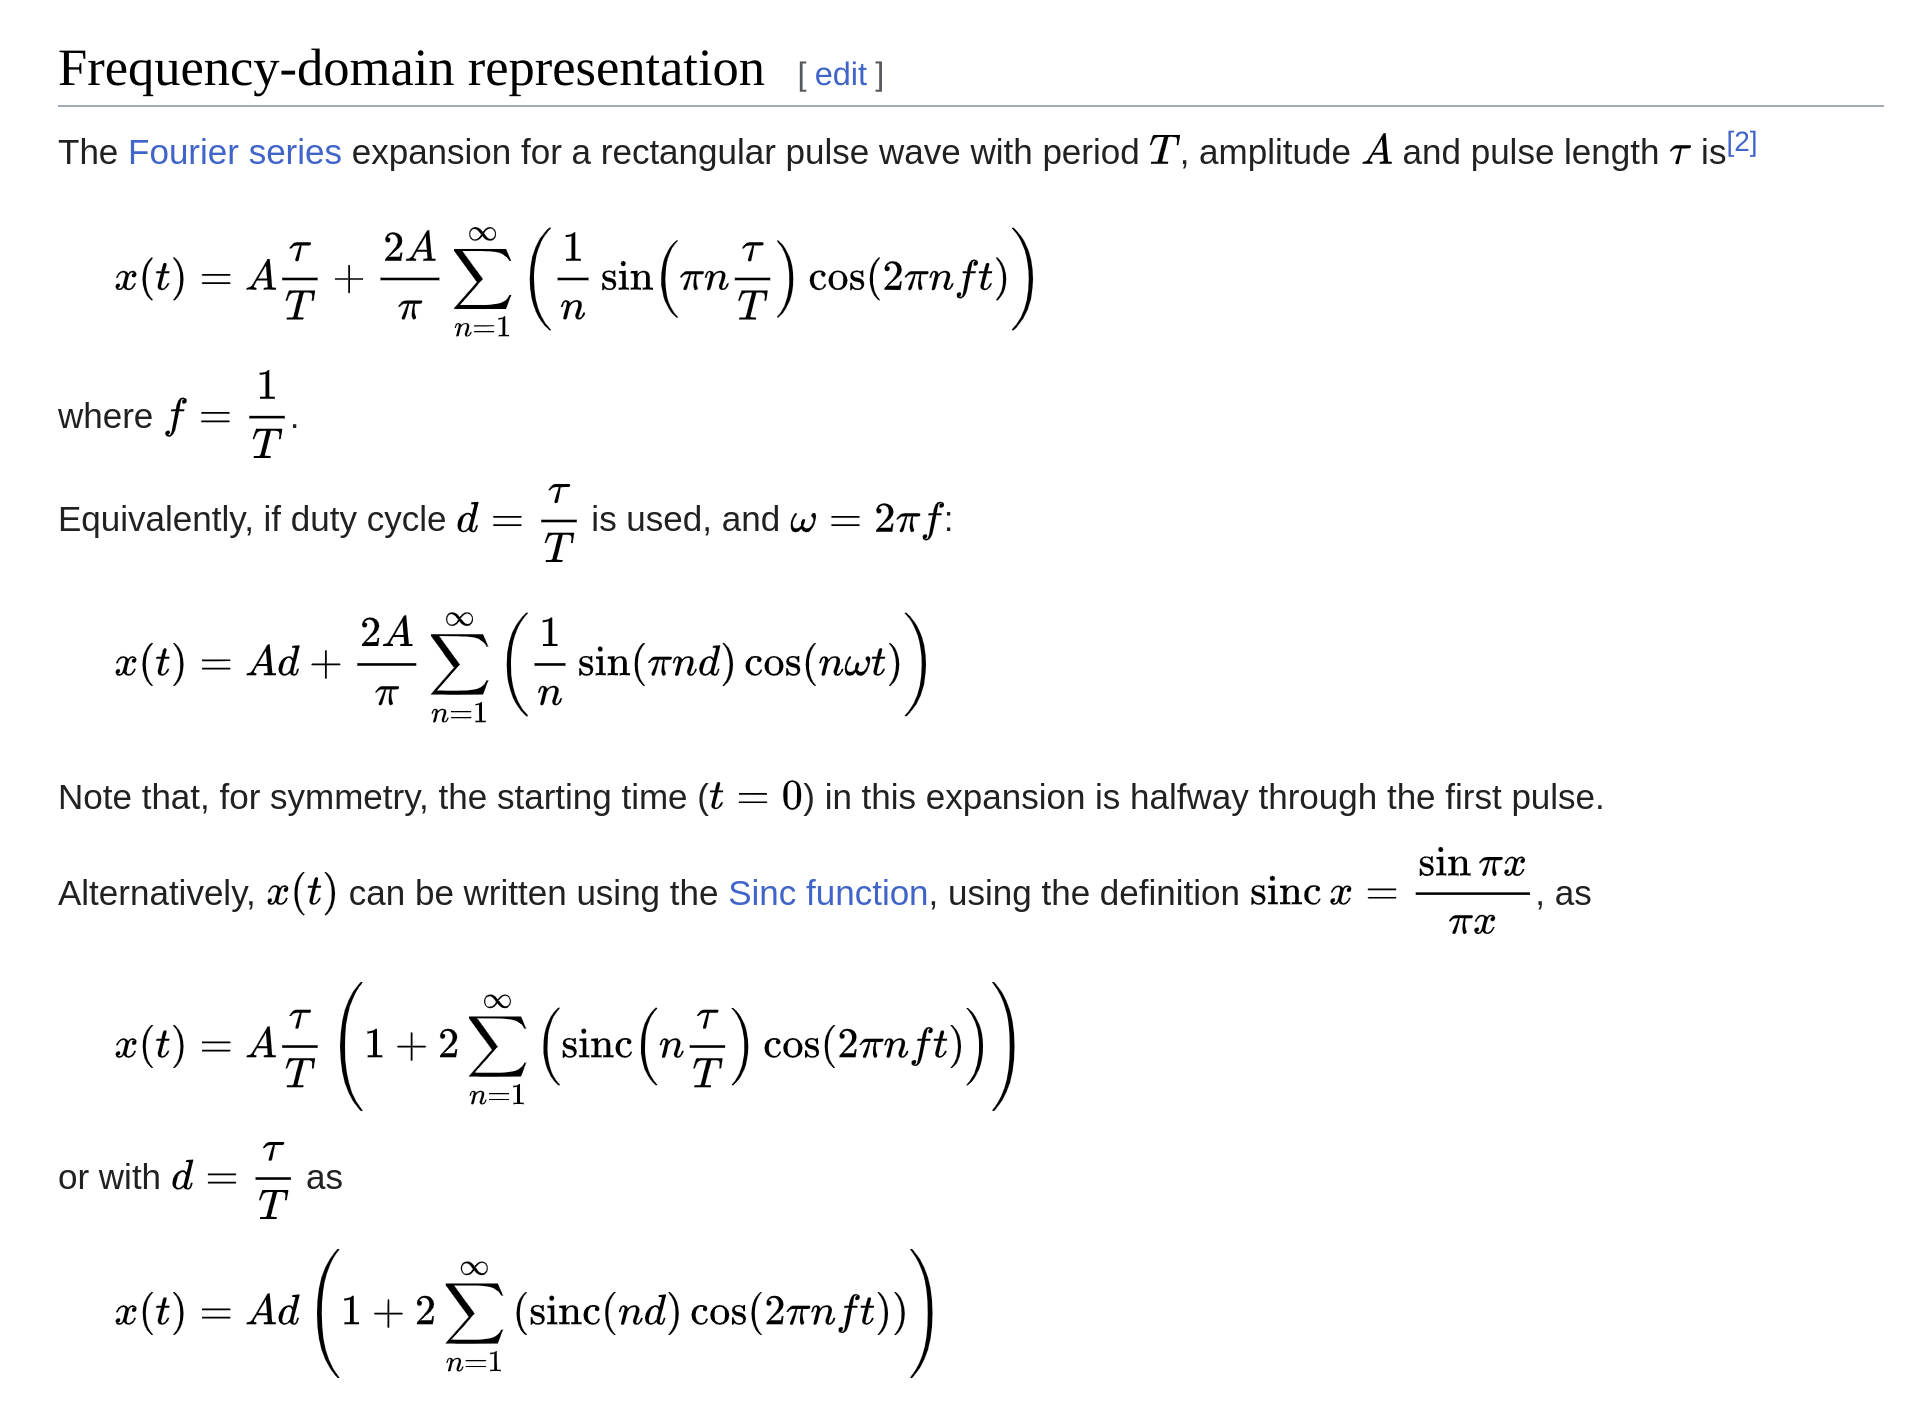

In [ ]:
#Simulate with known element values for L, C, R 

m = GEKKO()
m.time = np.linspace(0,5*Ts,500)

    
# Controlled Variable

e1 = m.Var(name='e1')
e3 = m.Var(name='e3')
e4 = m.Var(name='e4')
i4 = m.Var(name='i4')
i5 = m.Var(name='i5')


# Process model
m.Equation()


m.options.IMODE = 7 # dynamic sequential 
m.solve(disp=False)


In [ ]:
#Obtain desired circuit with known response 

m = GEKKO()
m.time = np.linspace(0,5*Ts,500)


# Manipulated variable
L = m.FV(value=0, lb=0, ub=100)
C = m.FV(
R = 
    
# Controlled Variable

# Process model
m.Equation()

    
# Objectives 
    
    
m.options.IMODE = 6 # control
m.solve(disp=False)

In [7]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

# Define the circuit parameters
Vin = 12.0    # Input voltage (V)
Rload = 4.0   # Load resistance (ohms)
Vout_ref = 5.0 # Reference output voltage (V)

# Create a GEKKO model
m = GEKKO(remote=True)
m.time = np.linspace(0,1e-6,101)

# Duty Cycle
D = m.MV(value=0.5, lb=0.0, ub=1.0, integer=True) # Duty cycle (0 to 1)
# initial guess / simulation
Dv = np.ones_like(m.time); Dv[30:]=0; Dv[50:]=1; Dv[70:]=0; Dv[90:]=1
D.value = Dv
D.STATUS = 0

# Constants
L = m.FV(5e-3,lb=4.5e-3,ub=5.5e-3) # Inductor value (H)
C = m.FV(100e-6,lb=90e-6,ub=110e-6) # Capacitor value (F)
L.STATUS = 0
C.STATUS = 0

# Equations (circuit model)
Vout = m.Var()  # Inductor voltage
Iout = m.Var()  # Inductor current
m.Equation(Vout.dt() == (Vin * D - Vout) / (L * C) - Iout / C)
m.Equation(Iout.dt() == (Vin * D - Vout) / L)

# Objective (minimize output voltage error)
m.Minimize((Vout - Vout_ref)**2)

# Set global options
m.options.IMODE = 6  # Control optimization mode (Dynamic Optimization)
m.options.NODES = 3  # Collocation nodes
m.options.SOLVER = 3 # IPOPT solver (use APOPT solver for D={0,1} with integer solution)

# Initialize the simulation problem
m.solve()

# Optimize circuit with continuous D (0-1)
D.STATUS=1
L.STATUS=1
C.STATUS=1
m.options.TIME_SHIFT=0
m.solve()

# Optimize circuit with discrete D {0,1}
m.options.SOLVER=1
m.options.TIME_SHIFT=0
m.solve()

# Plot the results
plt.figure(figsize=(8,5))
plt.subplot(3,1,1)
plt.plot(m.time, Vout.value, label='Output Voltage')
plt.plot([0,m.time[-1]],[Vout_ref,Vout_ref],'r--',label='Target Voltage')
plt.legend(); plt.grid()
plt.subplot(3,1,2)
plt.plot(m.time, Iout.value, label='Output Current')
plt.legend(); plt.grid()
plt.subplot(3,1,3)
plt.plot(m.time, D.value, label='Duty cycle')
plt.xlabel('Time'); plt.legend(); plt.grid()
plt.savefig('circuit.png',dpi=300)
plt.show()

apm 73.68.178.211_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:           1300
 Number of total equations: -         1300
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

ImportError: No solution or server unreachable.
  Show errors with m.solve(disp=True).
  Try local solve with m=GEKKO(remote=False).